In [185]:
import pandas as pd
import numpy as np

In [186]:
# wczytanie zbioru danych

In [187]:
df = pd.read_csv('flavors_of_cacao.csv'); df

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


In [188]:
df.rename({df.columns[0]: 'Company_Name'}, axis=1, inplace=True)

In [189]:
df.rename(lambda c: c.replace('\n', '_'), axis=1, inplace=True); df

,Company_Name,Specific Bean Origin_or Bar Name,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad Bean_Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


In [190]:
#analiza typow danych oraz wstepna analiza zakresu podstawywch statytystyk opisowych

In [191]:
df.dtypes

Company_Name                         object
Specific Bean Origin_or Bar Name     object
REF                                   int64
Review_Date                           int64
Cocoa_Percent                        object
Company_Location                     object
Rating                              float64
Bean_Type                            object
Broad Bean_Origin                    object
dtype: object

In [192]:
df.describe()

,REF,Review_Date,Rating
count,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,3.185933
std,552.886365,2.927210,0.478062
min,5.000000,2006.000000,1.000000
25%,576.000000,2010.000000,2.875000
50%,1069.000000,2013.000000,3.250000
75%,1502.000000,2015.000000,3.500000
max,1952.000000,2017.000000,5.000000


In [193]:
#Podzial na interwaly dla zmiennej Rating

In [194]:
pd.cut(df['Rating'].to_numpy(), 5)

[(3.4, 4.2], (2.6, 3.4], (2.6, 3.4], (3.4, 4.2], (3.4, 4.2], ..., (3.4, 4.2], (2.6, 3.4], (3.4, 4.2], (2.6, 3.4], (2.6, 3.4]]
Length: 1795
Categories (5, interval[float64, right]): [(0.996, 1.8] < (1.8, 2.6] < (2.6, 3.4] < (3.4, 4.2] < (4.2, 5.0]]

In [195]:
rating_bins = [float(i) for i in range(6)]
rating_bins.insert(4, 3.5)
rating_bins

[0.0, 1.0, 2.0, 3.0, 3.5, 4.0, 5.0]

In [196]:
df['Rating_Interval'] = pd.cut(df['Rating'].to_numpy(), bins=rating_bins)

In [197]:
from matplotlib import pyplot as plt
import seaborn as sns

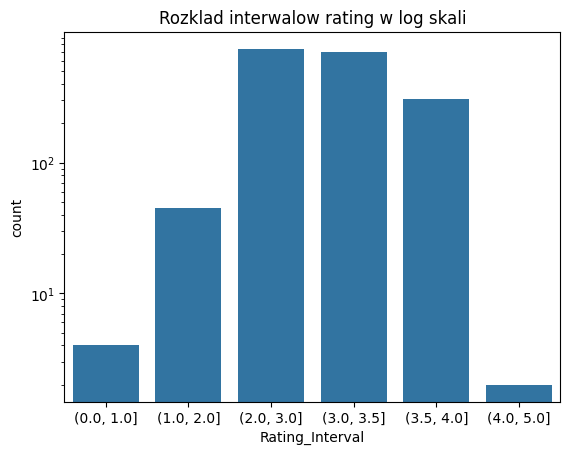

In [198]:
rating_plot = sns.countplot(data=df, x='Rating_Interval')
rating_plot.set_title('Rozklad interwalow rating w log skali')
plt.yscale('log')

In [199]:
df.groupby('Rating_Interval')['REF'].count()

C:\Users\kubao\AppData\Local\Temp\ipykernel_14824\2852443342.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Rating_Interval')['REF'].count()


Rating_Interval
(0.0, 1.0]      4
(1.0, 2.0]     45
(2.0, 3.0]    741
(3.0, 3.5]    695
(3.5, 4.0]    308
(4.0, 5.0]      2
Name: REF, dtype: int64

In [200]:
good_choco = df[(df['Rating_Interval'].astype('str') == '(4.0, 5.0]') | (df['Rating_Interval'].astype('str') == '(3.5, 4.0]')]

In [201]:
good_choco

,Company_Name,Specific Bean Origin_or Bar Name,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad Bean_Origin,Rating_Interval
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome,"(3.5, 4.0]"
8,A. Morin,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela,"(3.5, 4.0]"
9,A. Morin,Pablino,1319,2014,70%,France,4.00,,Peru,"(3.5, 4.0]"
13,A. Morin,Equateur,1011,2013,70%,France,3.75,,Ecuador,"(3.5, 4.0]"
17,A. Morin,Chuao,1015,2013,70%,France,4.00,Trinitario,Venezuela,"(3.5, 4.0]"
...,...,...,...,...,...,...,...,...,...,...
1773,Zokoko,Guadalcanal,1716,2016,78%,Australia,3.75,,Solomon Islands,"(3.5, 4.0]"
1777,Zokoko,"Tranquilidad, Baures",701,2011,72%,Australia,3.75,,Bolivia,"(3.5, 4.0]"
1783,Zotter,"Loma Los Pinos, Yacao region, D.R.",875,2012,62%,Austria,3.75,,Dominican Republic,"(3.5, 4.0]"
1787,Zotter,Santo Domingo,879,2012,70%,Austria,3.75,,Dominican Republic,"(3.5, 4.0]"


In [202]:
counted_ratings = good_choco.groupby('Company_Location')['REF'].count()
counted_ratings = counted_ratings.reset_index().rename({'REF': 'Count'}, axis=1)
counted_ratings = counted_ratings.sort_values('Count', axis=0, ascending=False)

In [203]:
counted_ratings[:10]

,Company_Location,Count
29,U.S.A.,111
12,France,39
7,Canada,34
18,Italy,17
2,Australia,15
28,U.K.,13
27,Switzerland,12
4,Belgium,10
11,Ecuador,5
13,Germany,5


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'U.S.A.'),
  Text(1, 0, 'France'),
  Text(2, 0, 'Canada'),
  Text(3, 0, 'Italy'),
  Text(4, 0, 'Australia'),
  Text(5, 0, 'U.K.'),
  Text(6, 0, 'Switzerland'),
  Text(7, 0, 'Belgium'),
  Text(8, 0, 'Ecuador'),
  Text(9, 0, 'Germany')])

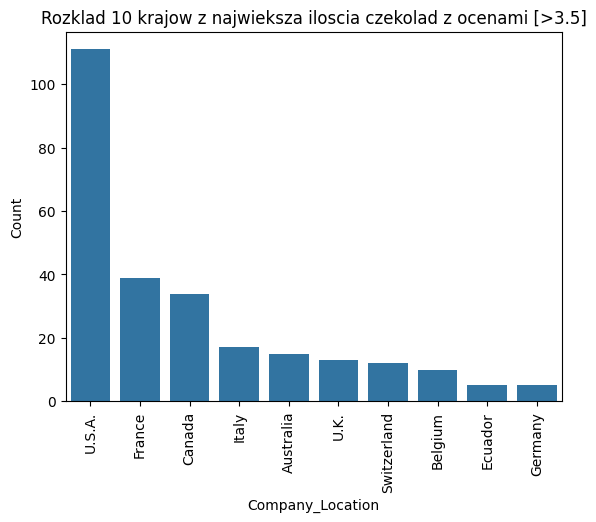

In [204]:
top10rated_plot = sns.barplot(x=counted_ratings['Company_Location'][:10], y=counted_ratings['Count'][:10])
top10rated_plot.set_title('Rozklad 10 krajow z najwieksza iloscia czekolad z ocenami [>3.5]')
plt.xticks(rotation='vertical')

In [205]:
beans = good_choco.groupby(['Rating_Interval', 'Bean_Type'])['REF'].count()
beans

C:\Users\kubao\AppData\Local\Temp\ipykernel_14824\683953139.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  beans = good_choco.groupby(['Rating_Interval', 'Bean_Type'])['REF'].count()


Rating_Interval  Bean_Type               
(0.0, 1.0]       Amazon mix                  0
                 Amazon, ICS                 0
                 Beniano                     0
                 Blend                       0
                 Blend-Forastero,Criollo     0
                                            ..
(4.0, 5.0]       Trinitario (85% Criollo)    0
                 Trinitario, Criollo         0
                 Trinitario, Nacional        0
                 Trinitario, TCGA            0
                                             0
Name: REF, Length: 156, dtype: int64

In [206]:
#Ziarna kawowe z najlepszymi ocenami

In [261]:
best_beans = beans.where(beans > 0, pd.NA).dropna().reset_index().rename({'REF': 'Count'}, axis=1).sort_values(by='Count', ascending=False)[1:10]

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Trinitario'),
  Text(1, 0, 'Criollo'),
  Text(2, 0, 'Forastero'),
  Text(3, 0, 'Forastero (Nacional)'),
  Text(4, 0, 'Blend'),
  Text(5, 0, 'Criollo, Trinitario'),
  Text(6, 0, 'Forastero (Parazinho)'),
  Text(7, 0, 'Criollo (Porcelana)'),
  Text(8, 0, 'Beniano')])

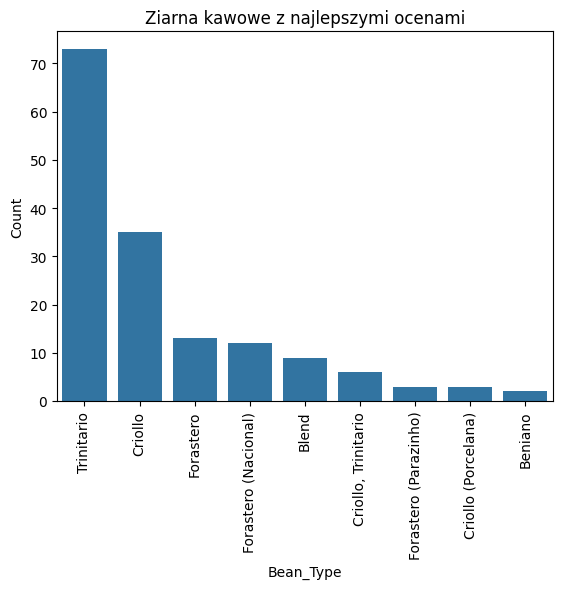

In [264]:
best_beans_plot = sns.barplot(data=best_beans, x='Bean_Type', y='Count')
best_beans_plot.set_title('Ziarna kawowe z najlepszymi ocenami')
plt.xticks(rotation='vertical')

In [208]:
#Regiony z ktorych sa najlepsze ziarna

In [259]:
region = good_choco.groupby(['Rating_Interval', 'Specific Bean Origin_or Bar Name'])['REF'].count()
region = region.where(region > 0, pd.NA).dropna().reset_index().rename({'REF': 'Count'}, axis=1)
region = region.sort_values('Count', axis=0, ascending=False)

C:\Users\kubao\AppData\Local\Temp\ipykernel_14824\227532059.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region = good_choco.groupby(['Rating_Interval', 'Specific Bean Origin_or Bar Name'])['REF'].count()


In [265]:
region

,Rating_Interval,Specific Bean Origin_or Bar Name,Count
137,"(3.5, 4.0]",Madagascar,11.0
72,"(3.5, 4.0]",Dominican Republic,6.0
164,"(3.5, 4.0]",Ocumare,6.0
189,"(3.5, 4.0]",Porcelana,5.0
181,"(3.5, 4.0]",Peru,4.0
...,...,...,...
249,"(3.5, 4.0]","Winak, Sumaco",1.0
250,"(3.5, 4.0]","Xoconusco, Chiapas",1.0
251,"(3.5, 4.0]","Zorzal Reserva, 2015 H., Kerchner",1.0
252,"(4.0, 5.0]",Chuao,1.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Madagascar'),
  Text(1, 0, 'Dominican Republic'),
  Text(2, 0, 'Ocumare'),
  Text(3, 0, 'Porcelana'),
  Text(4, 0, 'Peru'),
  Text(5, 0, 'Chuao'),
  Text(6, 0, 'Sambirano'),
  Text(7, 0, 'Monte Alegre, 3 diff. plantations'),
  Text(8, 0, 'Piura'),
  Text(9, 0, 'Venezuela')])

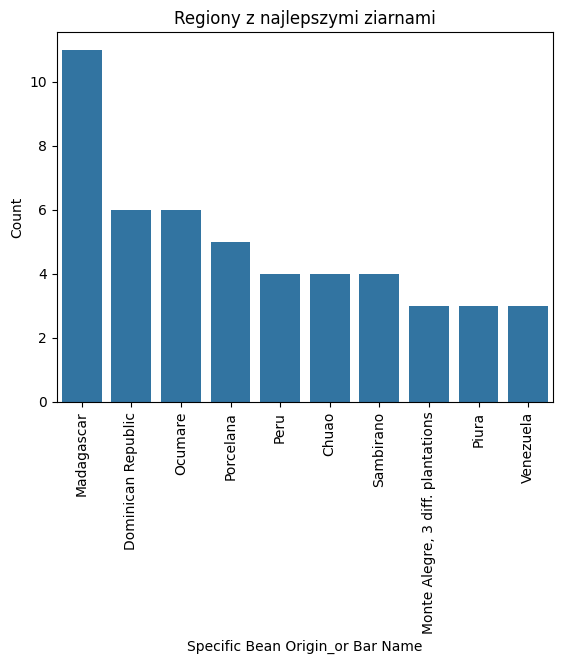

In [267]:
region_plot = sns.barplot(data=region[:10], x='Specific Bean Origin_or Bar Name', y='Count')
region_plot.set_title('Regiony z najlepszymi ziarnami')
plt.xticks(rotation='vertical')

In [210]:
#Srednia zawartosc kakao w czekoladach wg roku

In [211]:
sorted_by_date = df[['Company_Name', 'REF', 'Review_Date', 'Rating', 'Cocoa_Percent', 'Rating_Interval']].sort_values('REF', ascending=True)

In [212]:
sorted_by_date['Cocoa_Percent'] = sorted_by_date['Cocoa_Percent'].str.extract(r'(\d+)').astype(np.float64)

In [213]:
year_cocoa = sorted_by_date.groupby('Review_Date')['Cocoa_Percent'].mean()

Text(0.5, 1.0, 'Ocena, a zawartosc kakao')

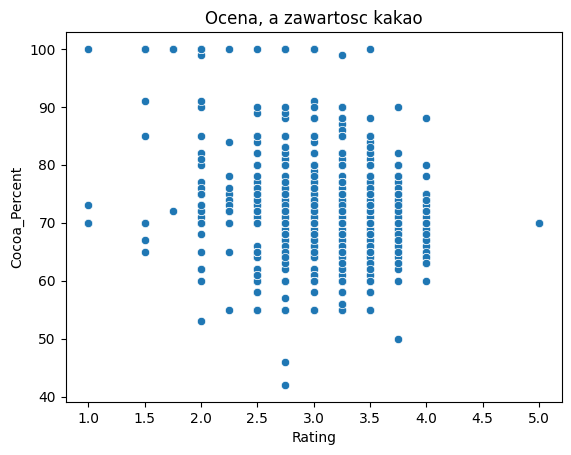

In [214]:
rat_cocoa = sns.scatterplot(data=sorted_by_date, x='Rating', y='Cocoa_Percent')
rat_cocoa.set_title('Ocena, a zawartosc kakao')

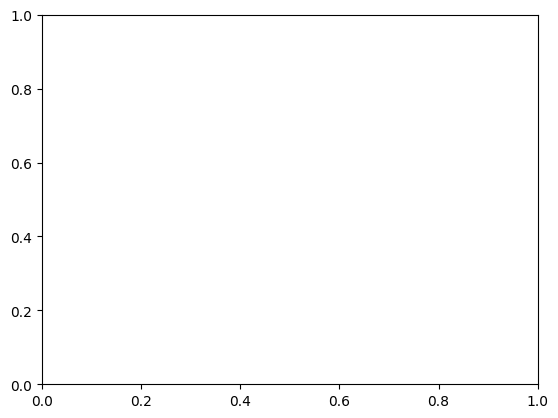

In [215]:
fig, ax = plt.subplots()

In [216]:
line_cocoa = sns.lineplot(year_cocoa, label='All', ax=ax)

In [217]:
cond = (sorted_by_date['Rating_Interval'].astype('str') == '(4.0, 5.0]') | (sorted_by_date['Rating_Interval'].astype('str') == '(3.5, 4.0]')
good_choco_val = sorted_by_date[cond].groupby('Review_Date')['Cocoa_Percent'].mean()

In [218]:
sns.lineplot(good_choco_val, label='Best', ax=ax)

<Axes: xlabel='Review_Date', ylabel='Cocoa_Percent'>

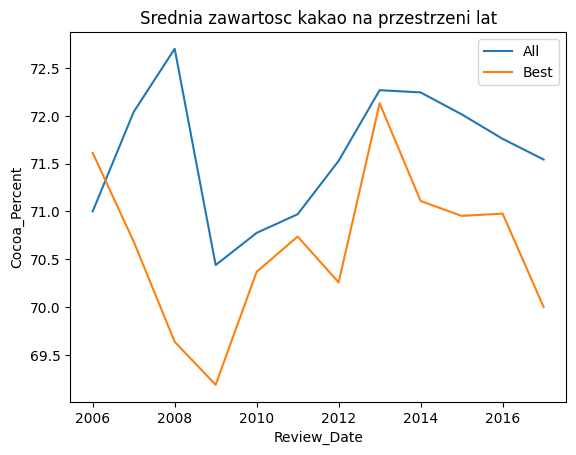

In [219]:
ax.set_title('Srednia zawartosc kakao na przestrzeni lat')
ax.legend()
fig

C:\Users\kubao\AppData\Local\Temp\ipykernel_14824\3896856382.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_choc = sorted_by_date.groupby('Rating_Interval')['Cocoa_Percent'].mean().reset_index()


Text(0.5, 1.0, 'Ocena a zawartosc kakao')

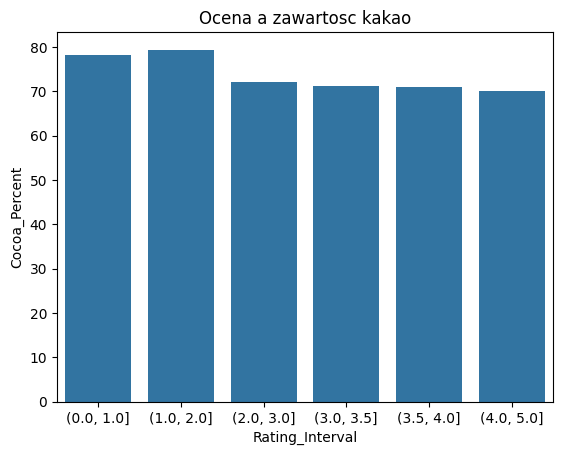

In [250]:
mean_choc = sorted_by_date.groupby('Rating_Interval')['Cocoa_Percent'].mean().reset_index()
rat_per = sns.barplot(data=mean_choc, x='Rating_Interval', y='Cocoa_Percent')
rat_per.set_title('Ocena a zawartosc kakao')

In [221]:
mean_by_year = sorted_by_date.groupby(['Company_Name', 'Review_Date'])['Cocoa_Percent'].mean();
mean_by_year

Company_Name            Review_Date
A. Morin                2012           66.500000
                        2013           69.363636
                        2014           70.000000
                        2015           70.000000
                        2016           63.000000
                                         ...    
organicfair             2013           72.400000
twenty-four blackbirds  2011           73.000000
                        2013           71.500000
                        2014           75.000000
                        2015           75.000000
Name: Cocoa_Percent, Length: 728, dtype: float64

In [222]:
val_dict = {}
for first_i in mean_by_year.index.levels[0]:
    last_year = mean_by_year[first_i].index.max()
    first_year = mean_by_year[first_i].index.min()
    val_dict[first_i] = mean_by_year[first_i][last_year] - mean_by_year[first_i][first_year]

In [223]:
cocoa_drop = pd.Series(val_dict).sort_values().reset_index()
cocoa_drop = cocoa_drop.rename({'index': 'Company_Name', 0: 'drop'}, axis=1)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Chchukululu (Tulicorp)'),
  Text(1, 0, 'Hotel Chocolat'),
  Text(2, 0, 'Raaka'),
  Text(3, 0, 'Theo'),
  Text(4, 0, 'Claudio Corallo'),
  Text(5, 0, 'Potomac'),
  Text(6, 0, 'La Maison du Chocolat (Valrhona)'),
  Text(7, 0, 'Callebaut'),
  Text(8, 0, 'Felchlin'),
  Text(9, 0, 'TCHO')])

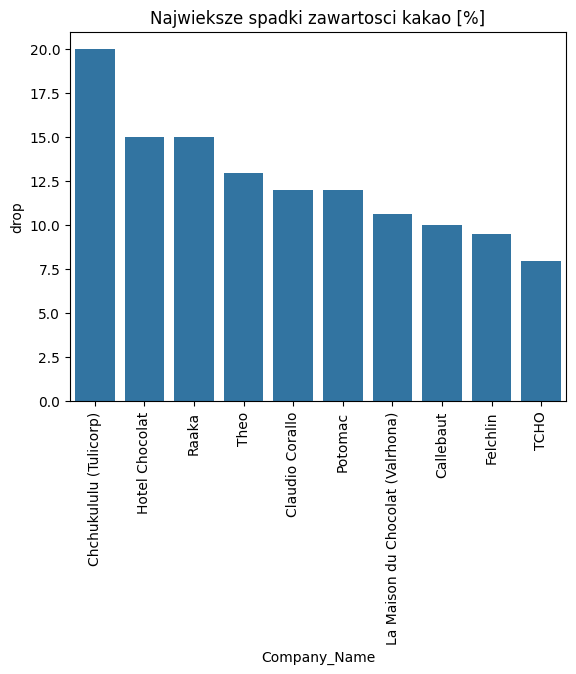

In [238]:
biggest_drops = cocoa_drop.sort_values(by='drop', ascending=True)
drops_plot = sns.barplot(x=biggest_drops[:10]['Company_Name'], y=biggest_drops[:10]['drop'].abs())
drops_plot.set_title('Najwieksze spadki zawartosci kakao [%]')
plt.xticks(rotation='vertical')

In [247]:
best_companies = df.groupby('Company_Name')['Rating'].mean().reset_index()
best_companies = best_companies.sort_values(by='Rating', ascending=False).reset_index(drop=True)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Tobago Estate (Pralus)'),
  Text(1, 0, 'Ocelot'),
  Text(2, 0, 'Heirloom Cacao Preservation (Zokoko)'),
  Text(3, 0, 'Amedei'),
  Text(4, 0, 'Matale'),
  Text(5, 0, 'Patric'),
  Text(6, 0, 'Idilio (Felchlin)'),
  Text(7, 0, 'Un Dimanche A Paris'),
  Text(8, 0, "Chocola'te"),
  Text(9, 0, 'Obolo')])

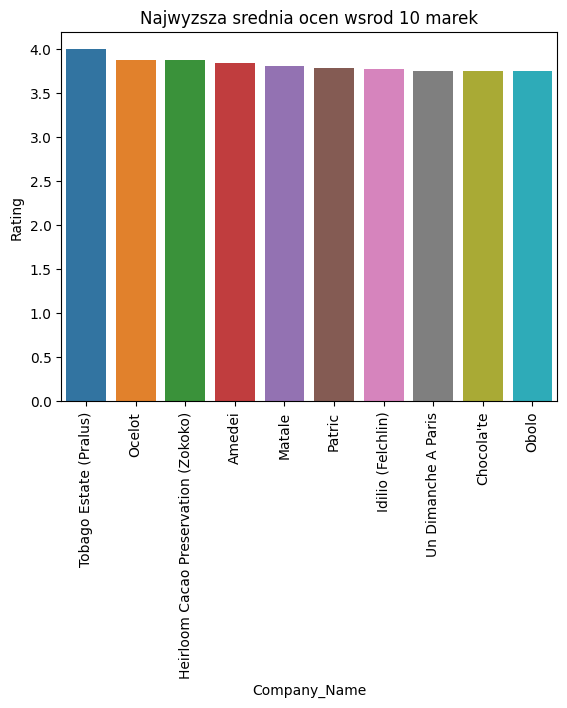

In [244]:
best_comp = sns.barplot(data=best_companies[:10], x='Company_Name', y='Rating', hue='Company_Name')
best_comp.set_title('Najwyzsza srednia ocen wsrod 10 marek')
plt.xticks(rotation='vertical')

In [251]:
rat_over_year = df.groupby(['Company_Name', 'Review_Date'])['Rating'].mean()

In [252]:
val_dict = {}
for first_i in rat_over_year.index.levels[0]:
    last_year = rat_over_year[first_i].index.max()
    first_year = rat_over_year[first_i].index.min()
    val_dict[first_i] = rat_over_year[first_i][last_year] - rat_over_year[first_i][first_year]

In [256]:
rating_diff = pd.Series(val_dict).sort_values().reset_index()
rating_diff = rating_diff.rename({'index': 'Company_Name', 0: 'Rating'}, axis=1)
rating_diff = rating_diff.sort_values(by='Rating', ascending=False)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Callebaut'),
  Text(1, 0, 'Middlebury'),
  Text(2, 0, 'Dolfin (Belcolade)'),
  Text(3, 0, 'Scharffen Berger'),
  Text(4, 0, 'Pacari'),
  Text(5, 0, 'Naive'),
  Text(6, 0, 'Claudio Corallo'),
  Text(7, 0, 'Cacao Barry'),
  Text(8, 0, 'Askinosie'),
  Text(9, 0, 'El Ceibo')])

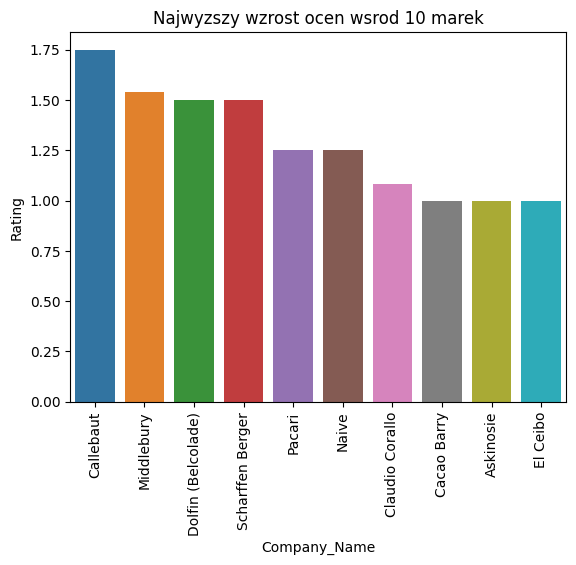

In [257]:
rating_diff_plot = sns.barplot(data=rating_diff[:10], x='Company_Name', y='Rating', hue='Company_Name')
rating_diff_plot.set_title('Najwyzszy wzrost ocen wsrod 10 marek')
plt.xticks(rotation='vertical')